In [1]:
import numpy as np
import matplotlib.pyplot as plt


### If you put an irreversible phase in the middle, the N-body reaction becomes as if it were a one-body reaction.

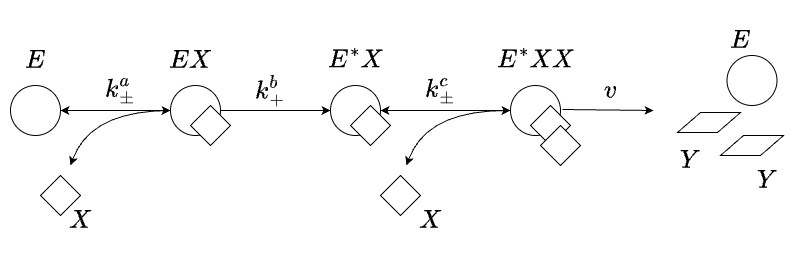

## Case of bi-reaction and a single maturation step

Here, the concentration of free enzyme $[E]$ is assumed to be sufficiently large and constant (this assumption is not essential)
The equation is given by
$$\frac{d[EX]}{dt}=k^a_+[E][X]-k^a_-[EX]-k^b_+[EX]$$
$$\frac{d[E^*X]}{dt}=k^b_+[EX]-k^c_+[E^*X][X]+k^c_-[E^*XX]$$
$$\frac{d[E^*XX]}{dt}=k^c_+[E^*X][X]-k^c_-[E^*XX]-v[E^*XX]$$
The reaction corresponding to $k^b_*$ is a maturation reaction (irreversible). For example, you could think of it as something like ‘the waiting time it takes to get another one after a join’.

By solving the equations, we obtain
$$[EX]=\frac{k^a_+}{k^a_-+k^b_+}[E][X]$$
$$[E^*X]=\frac{k^b_+}{k_+^c-k^c_+k^c_-/(v+k^c_-)}\frac{k^a_+}{k^a_-+k^b_+}[E]$$
$$[E^*XX]=\frac{k^a_+k^b_+}{v(k^a_-+k^b_+)}[E][X]$$

In the following, we visualize the solution


In [8]:
def solve_quad(X):
    kap, kbp, kcp, v = 1, 0.1, 10, 0.1
    kam, kcm = 0.1, 0.01

    # Coefficients of the linear equations
    A = np.array([[-kam-kbp, 0, 0],[kbp, -kcp*X,kcm],[0,kcp*X,-kcm-v]])

    # Dependent variable values
    b = np.array([-kap*X, 0, 0])

    # Solve the system of equations
    x = np.linalg.solve(A, b)

    return x

In [9]:
X = np.logspace(-3, 3, 100)
Y = np.array([solve(x) for x in X])

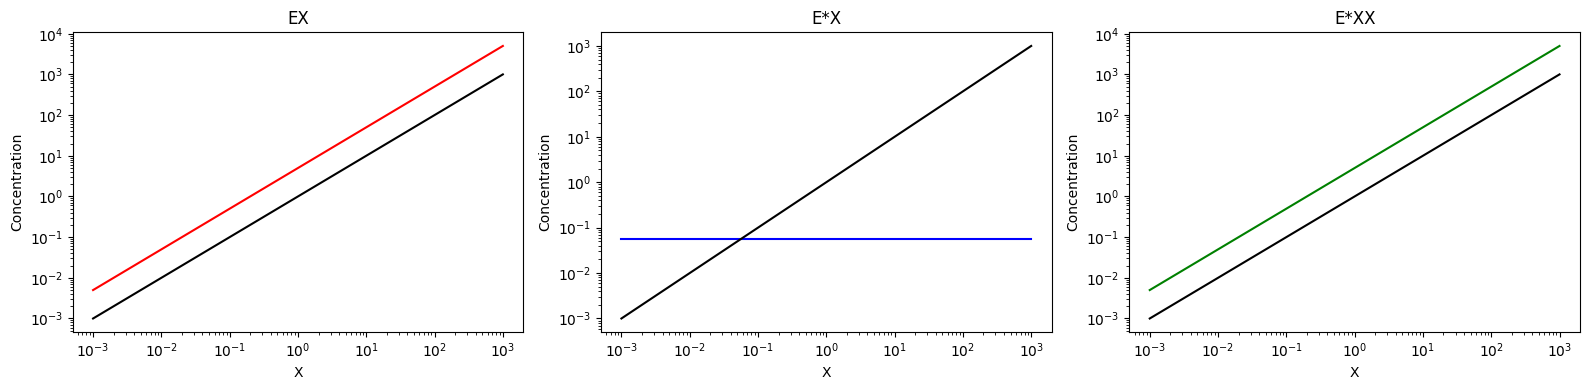

In [27]:
# Create the figure and the subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 4)) 

color = ['r','b','g']
chem = ['EX','E*X','E*XX']
for i in range(3):
    # Plot f(X) in the first panel
    axs[i].plot(X, Y[:,i], color[i])  # 'r' for red line
    axs[i].plot(X, X, 'black')
    axs[i].set_title(chem[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Concentration')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
    
# Adjust layout to not overlap subplots
plt.tight_layout()

# Show the plot
plt.show()

We have now considered a one-step maturation for a two-body reaction, but below we will consider one step for three bodies and two steps for three bodies respectively. No matter how many bodies there are, we can solve it by hand, but it is faster to look at it, so we solve it numerically.

The result is linear no matter how many body reactions if there is a maturation after each bonding and every time before the next bonding

## Case of tri-reaction and a single maturation step

In [33]:
def solve_tri_uni(X):
    kap, kbp, kcp, kdp, v = 1, 0.1, 10, 1, 0.1
    kam, kbm, kdm = 0.1, 0.01, 0.1

    # Coefficients of the linear equations
    A = np.array([[-kam-kbp*X, kbm, 0, 0],[kbp*X, -kbm-kcp, 0, 0],[0,kcp,-kdp*X, kdm],[0,0,kdp*X,-v-kdm]])

    # Dependent variable values
    b = np.array([-kap*X, 0, 0,0])

    # Solve the system of equations
    x = np.linalg.solve(A, b)

    return x

In [34]:
X = np.logspace(-3, 3, 100)
Y = np.array([solve_tri(x) for x in X])

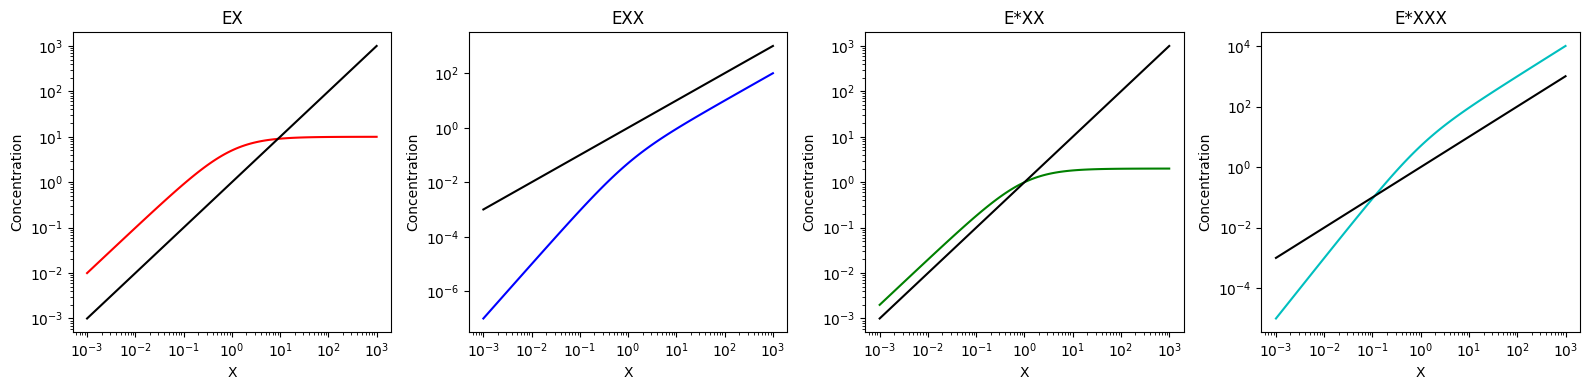

In [37]:
# Create the figure and the subplots
fig, axs = plt.subplots(1, 4, figsize=(16, 4)) 

color = ['r','b','g','c']
chem = ['EX','EXX','E*XX','E*XXX']
for i in range(4):
    # Plot f(X) in the first panel
    axs[i].plot(X, Y[:,i], color[i])  # 'r' for red line
    axs[i].plot(X, X, 'black')
    axs[i].set_title(chem[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Concentration')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
# Adjust layout to not overlap subplots
plt.tight_layout()

# Show the plot
plt.show()

## Case of tri-reaction and bi-maturation step

In [47]:
def solve_tri_bi(X):
    kap, kbp, kcp, kdp, kep, v = 1, 0.1, 10, 1, 0.1, 1
    kam, kcm, kem  = 0.1, 0.01, 0.1

    # Coefficients of the linear equations
    A = np.array([[-kam-kbp, 0, 0, 0, 0],[kbp, -kcp*X, kcm, 0, 0],[0,kcp*X,-kcm-kdp, 0, 0],[0,0,kdp,-kep*X,kem],[0, 0, 0, kep*X, -kem-v]])

    # Dependent variable values
    b = np.array([-kap*X, 0, 0, 0, 0])

    # Solve the system of equations
    x = np.linalg.solve(A, b)

    return x

In [48]:
X = np.logspace(-3, 3, 100)
Y = np.array([solve_tri_bi(x) for x in X])

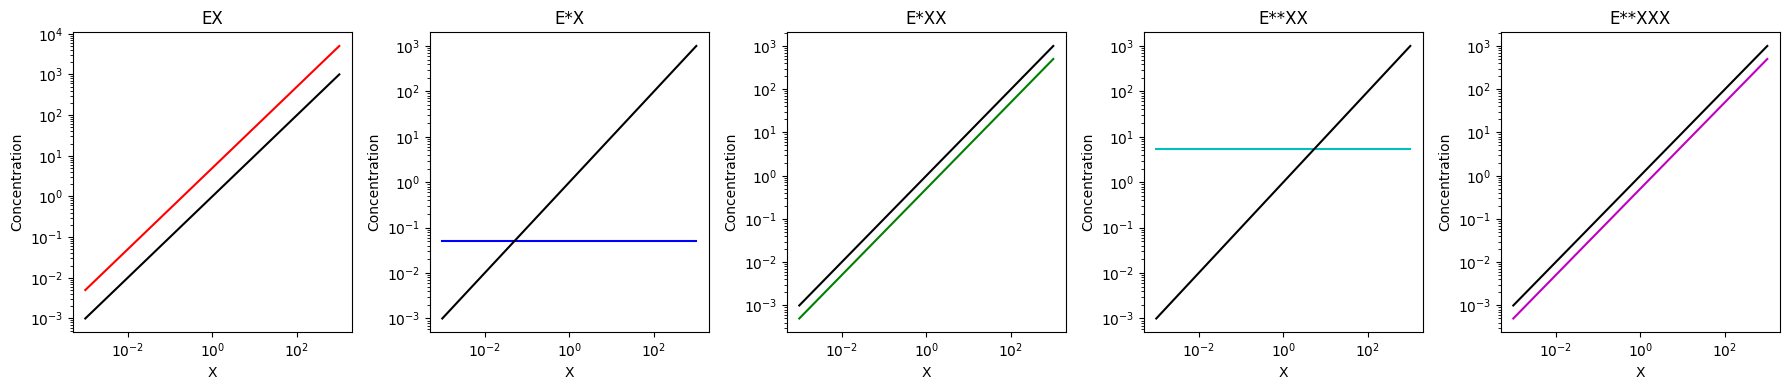

In [50]:
# Create the figure and the subplots
fig, axs = plt.subplots(1, 5, figsize=(18, 4)) 

color = ['r','b','g','c','m']
chem = ['EX','E*X','E*XX','E**XX','E**XXX']
for i in range(5):
    # Plot f(X) in the first panel
    axs[i].plot(X, Y[:,i], color[i])  # 'r' for red line
    axs[i].plot(X, X, 'black')
    axs[i].set_title(chem[i])
    axs[i].set_xlabel('X')
    axs[i].set_ylabel('Concentration')
    axs[i].set_xscale('log')
    axs[i].set_yscale('log')
    
# Adjust layout to not overlap subplots
plt.tight_layout()

# Show the plot
plt.show()